 Hello everyone, I am creating predictive model which will predict the chances of heart attack
 I am doing this project because now a days many people are died due to heart attack
 Therefore i am creating this model so that we can predict patient situation about heart attack  and so that we can treat the patient at the right time. SO that we can decrease the number of  dies

# EDA

In [42]:
# I am importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
data = pd.read_csv("heart_attack_prediction_india.csv") # Loading dataset
data.head(10) # to see the first 10 rows of dataset

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease,Heart Attack Risk
0,69,0,4,109,487,1,1,122,1,3.51,...,2,1,1,0,0,0,0,1,1,0
1,32,0,2,125,170,0,1,113,1,4.74,...,1,0,1,1,0,0,0,2,0,1
2,89,0,2,186,543,1,0,165,1,2.70,...,1,0,0,1,0,1,1,3,0,0
3,78,0,2,104,367,0,0,117,1,0.62,...,1,1,0,1,0,1,0,1,0,1
4,38,1,1,151,158,1,0,123,1,2.00,...,2,0,1,1,0,1,0,2,0,1
5,92,1,4,199,560,0,0,213,1,0.97,...,3,0,1,0,0,0,1,1,0,1
6,92,1,2,92,537,0,0,161,1,4.69,...,3,1,0,1,0,0,1,1,0,1
7,41,1,2,182,143,1,0,213,1,4.20,...,2,0,0,1,0,0,0,2,1,1
8,20,0,3,180,371,1,1,120,0,0.53,...,2,1,1,1,1,0,0,1,1,0
9,39,0,2,94,489,0,0,87,0,3.73,...,1,1,1,0,1,1,1,2,1,0


In [3]:
data.shape #to see the numbero of rows and columns in dataset

(7000, 22)

In [4]:
data.info() #this functions shows the basic information about dataset like all columns names, 
#rows, columns also, data types of each columns, we can look for null values also

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   int64  
 1   Gender                             7000 non-null   int64  
 2   Chest Pain Type                    7000 non-null   int64  
 3   Resting Blood Pressure             7000 non-null   int64  
 4   Cholesterol                        7000 non-null   int64  
 5   Fasting Blood Sugar (> 120 mg/dL)  7000 non-null   int64  
 6   Resting ECG Results                7000 non-null   int64  
 7   Max Heart Rate Achieved            7000 non-null   int64  
 8   Exercise-Induced Angina            7000 non-null   int64  
 9   Old Peak (ST Depression)           7000 non-null   float64
 10  Slope of Peak Exercise ST Segment  7000 non-null   int64  
 11  Number of Major Vessels (0-3)      7000 non-null   int64

In [5]:
data.describe() # to see the statistical summary of each numerical column

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease,Heart Attack Risk
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,58.227857,0.492571,2.507857,144.207857,351.351000,0.492429,0.489571,144.431857,0.504571,2.997859,...,1.986857,0.497714,0.506,0.498000,0.493571,0.489000,0.499571,2.010286,0.498286,0.500429
std,23.511403,0.499981,1.119491,31.682105,146.303141,0.499978,0.499927,43.224027,0.500015,1.740264,...,0.813937,0.500030,0.500,0.500032,0.499994,0.499915,0.500036,0.812924,0.500033,0.500036
min,18.000000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,38.000000,0.000000,2.000000,117.000000,223.000000,0.000000,0.000000,107.000000,0.000000,1.500000,...,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,58.000000,0.000000,3.000000,144.000000,354.000000,0.000000,0.000000,144.000000,1.000000,2.990000,...,2.000000,0.000000,1.000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,78.000000,1.000000,4.000000,172.000000,480.000000,1.000000,1.000000,182.000000,1.000000,4.530000,...,3.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
max,99.000000,1.000000,4.000000,199.000000,599.000000,1.000000,1.000000,219.000000,1.000000,6.000000,...,3.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [6]:
data.dtypes  # this function only shows the data type of each columns

Age                                    int64
Gender                                 int64
Chest Pain Type                        int64
Resting Blood Pressure                 int64
Cholesterol                            int64
Fasting Blood Sugar (> 120 mg/dL)      int64
Resting ECG Results                    int64
Max Heart Rate Achieved                int64
Exercise-Induced Angina                int64
Old Peak (ST Depression)             float64
Slope of Peak Exercise ST Segment      int64
Number of Major Vessels (0-3)          int64
Thalassemia                            int64
Smoking History                        int64
Obesity (BMI > 30)                     int64
Hypertension History                   int64
Diabetes History                       int64
Alcohol Consumption                    int64
Physical Activity                      int64
Stress Levels                          int64
Family History of Heart Disease        int64
Heart Attack Risk                      int64
dtype: obj

In [7]:
data.isnull().sum() # to see dataset has null values or not

Age                                  0
Gender                               0
Chest Pain Type                      0
Resting Blood Pressure               0
Cholesterol                          0
Fasting Blood Sugar (> 120 mg/dL)    0
Resting ECG Results                  0
Max Heart Rate Achieved              0
Exercise-Induced Angina              0
Old Peak (ST Depression)             0
Slope of Peak Exercise ST Segment    0
Number of Major Vessels (0-3)        0
Thalassemia                          0
Smoking History                      0
Obesity (BMI > 30)                   0
Hypertension History                 0
Diabetes History                     0
Alcohol Consumption                  0
Physical Activity                    0
Stress Levels                        0
Family History of Heart Disease      0
Heart Attack Risk                    0
dtype: int64

our data has no missing values

In [8]:
# I am using iqr method to see outliers present or not in dataset

outliers = {}
for col in data.select_dtypes(include=['int64','float64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    olr = data[(data[col]<lower) | (data[col]>upper)][col]
    outliers[col] = olr

for col, values in outliers.items():
    if(len(values)==0):
        print(f"{col}: No Outlier")
    else:
        print(f"{col}: Outliers Present {(len(values))}")

Age: No Outlier
Gender: No Outlier
Chest Pain Type: No Outlier
Resting Blood Pressure: No Outlier
Cholesterol: No Outlier
Fasting Blood Sugar (> 120 mg/dL): No Outlier
Resting ECG Results: No Outlier
Max Heart Rate Achieved: No Outlier
Exercise-Induced Angina: No Outlier
Old Peak (ST Depression): No Outlier
Slope of Peak Exercise ST Segment: No Outlier
Number of Major Vessels (0-3): No Outlier
Thalassemia: No Outlier
Smoking History: No Outlier
Obesity (BMI > 30): No Outlier
Hypertension History: No Outlier
Diabetes History: No Outlier
Alcohol Consumption: No Outlier
Physical Activity: No Outlier
Stress Levels: No Outlier
Family History of Heart Disease: No Outlier
Heart Attack Risk: No Outlier


We can see that there is no outlier in any of the columns. So, our data is clean.
Now, we can do visualization

# Visualization

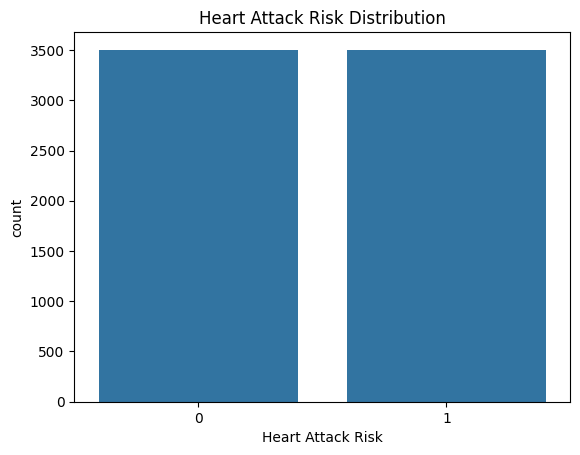

In [9]:
# to see our target variable "Heart Attack Risk" is balanced or not
sns.countplot(x='Heart Attack Risk', data=data)
plt.title("Heart Attack Risk Distribution")
plt.show()


we can see that both class 0 -> low risk and 1 -> high risk, are balanced

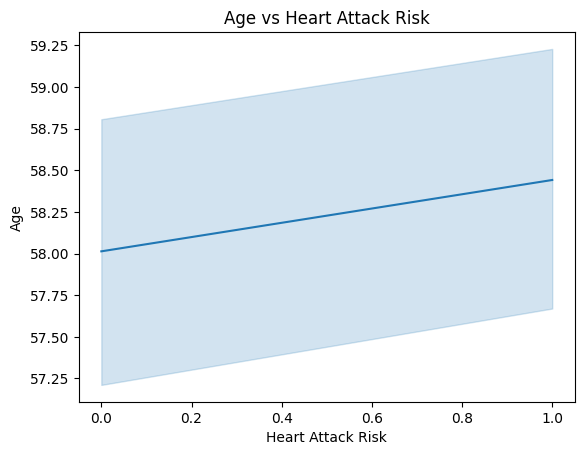

In [10]:
# to see attack risk accoring to age
sns.lineplot(x='Heart Attack Risk', y='Age', data=data)
plt.title("Age vs Heart Attack Risk")
plt.show()

We can see that as the age increases after 58, risk of heart attack also increases

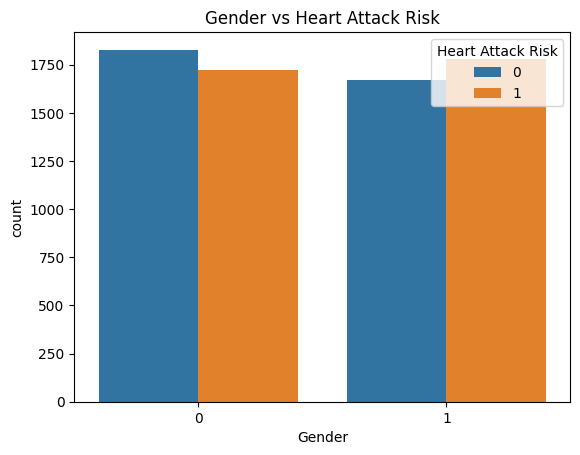

In [11]:
# to see variation of heart attack risk according to gender
sns.countplot(x='Gender', hue='Heart Attack Risk', data=data)
plt.title("Gender vs Heart Attack Risk")
plt.show()


we can see that male have high risk of attack compared to female

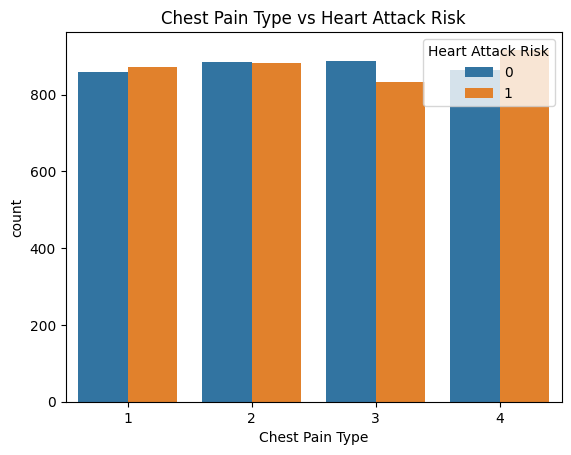

In [12]:
# to see which chest pain type mostly occurs in case of attack
sns.countplot(x='Chest Pain Type', hue='Heart Attack Risk', data=data)
plt.title("Chest Pain Type vs Heart Attack Risk")
plt.show()

1: Typical Angina, 2: Atypical Angina, 3: Non-anginal Pain, 4: Asymptomatic

In [13]:
# we can see that Typical anginal pain and Asymptomatical pain have high risk of heart attack 
# compared to Atypical Anginal pain and Non-anginal pain

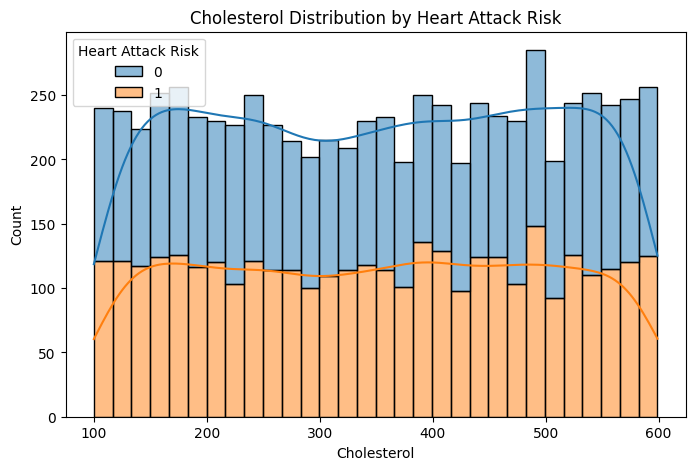

In [14]:
# to see what is the conition of cholesterol in body
plt.figure(figsize=(8,5))
sns.histplot(
    data=data,
    x='Cholesterol',
    hue='Heart Attack Risk',
    kde=True,
    bins=30,
    multiple='stack'
)

plt.title("Cholesterol Distribution by Heart Attack Risk")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

We can not say clearly on the basis of cholesterol because blue and orange graphs are overlaped

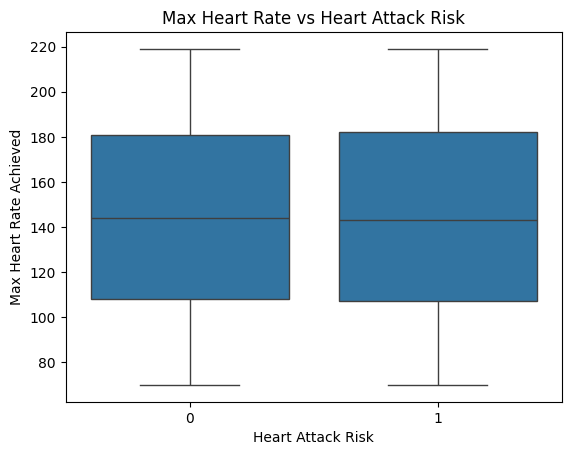

In [15]:
# to see the max heart rate of heart patients
sns.boxplot(x='Heart Attack Risk', y='Max Heart Rate Achieved', data=data)
plt.title("Max Heart Rate vs Heart Attack Risk")
plt.show()

Bothe the median values are almost same level so this alone can not be the reason

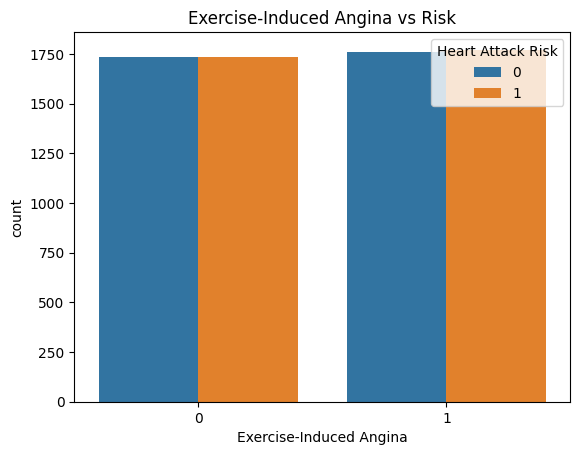

In [16]:
# to see the exercise induced anginal condition 
sns.countplot(x='Exercise-Induced Angina', hue='Heart Attack Risk', data=data)
plt.title("Exercise-Induced Angina vs Risk")
plt.show()

both the graphs are approx. same so this also can not do anything alone, there should be another reason also

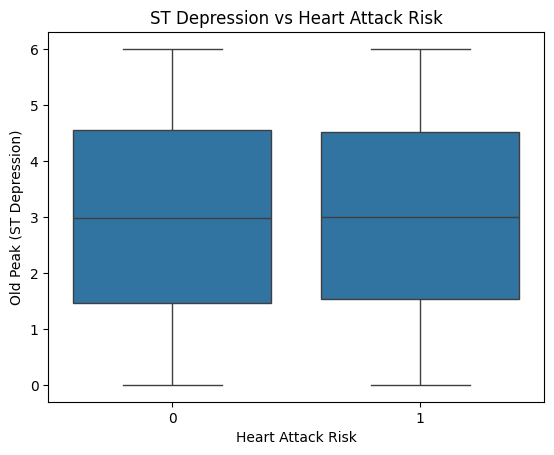

In [17]:
# to seee the old peak(ST Depression) and attack risk relation
sns.boxplot(x='Heart Attack Risk', y='Old Peak (ST Depression)', data=data)
plt.title("ST Depression vs Heart Attack Risk")
plt.show()

both boxplot median values are almost at same level, so we can not clear reason from here also

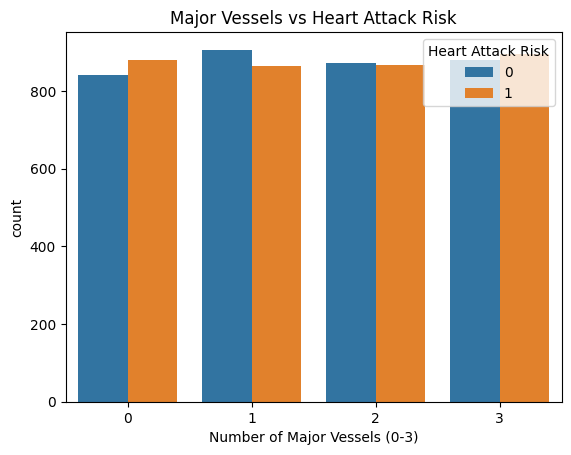

In [18]:
# visualize the risk according to number of major vessels
# Integer values (0 to 3)
sns.countplot(x='Number of Major Vessels (0-3)', hue='Heart Attack Risk', data=data)
plt.title("Major Vessels vs Heart Attack Risk")
plt.show()

we can see that major vessels 0 and 3 have the higher risk compared to major vessels 1 and 2

In [19]:
data.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease,Heart Attack Risk
0,69,0,4,109,487,1,1,122,1,3.51,...,2,1,1,0,0,0,0,1,1,0
1,32,0,2,125,170,0,1,113,1,4.74,...,1,0,1,1,0,0,0,2,0,1
2,89,0,2,186,543,1,0,165,1,2.70,...,1,0,0,1,0,1,1,3,0,0
3,78,0,2,104,367,0,0,117,1,0.62,...,1,1,0,1,0,1,0,1,0,1
4,38,1,1,151,158,1,0,123,1,2.00,...,2,0,1,1,0,1,0,2,0,1


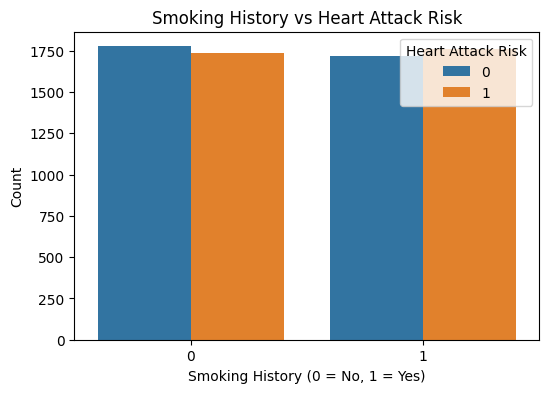

In [20]:
# to see, can smoking be the one of major reasons
plt.figure(figsize=(6,4))
sns.countplot(x='Smoking History',hue='Heart Attack Risk',data=data)
plt.title("Smoking History vs Heart Attack Risk")
plt.xlabel("Smoking History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

we can see that smoking can be the reason clearly

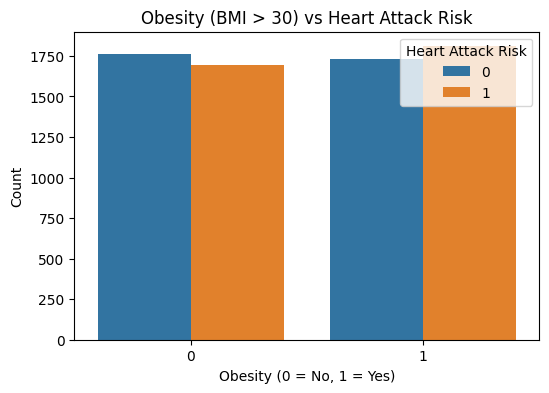

In [21]:
# 0: No, 1: BMI ≤ 30; 1: Yes, BMI > 30
# analyse the body mass index(bmi) of heart patients

plt.figure(figsize=(6,4))
sns.countplot(x='Obesity (BMI > 30)',hue='Heart Attack Risk',data=data)
plt.title("Obesity (BMI > 30) vs Heart Attack Risk")
plt.xlabel("Obesity (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

we can see the can also play a major role in heart attack ac to dataset

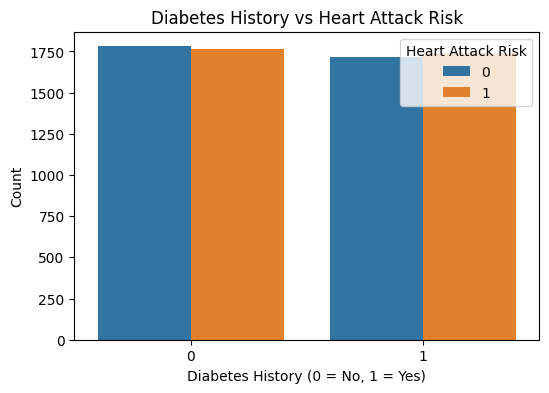

In [22]:
# can diabetes patiets suffer from heart risk
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes History',hue='Heart Attack Risk',data=data)
plt.title("Diabetes History vs Heart Attack Risk")
plt.xlabel("Diabetes History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

yes, diabetes can also be the one of reason

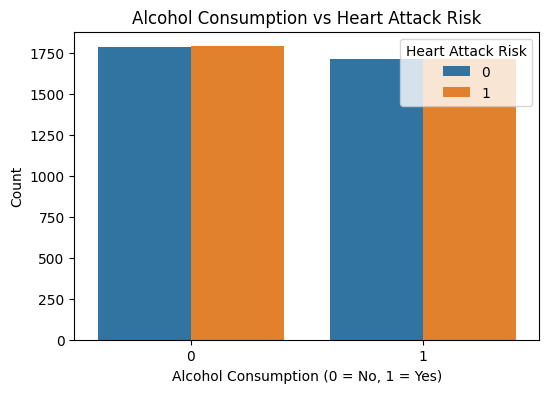

In [23]:
# can alcohol consumption increase the chances of heart attack
plt.figure(figsize=(6,4))
sns.countplot(x='Alcohol Consumption',hue='Heart Attack Risk',data=data)
plt.title("Alcohol Consumption vs Heart Attack Risk")
plt.xlabel("Alcohol Consumption (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

clearly, we can see that according to this dataset, those people who consume alcohol, have high risk of heart attack compared to those people who do not consume alcohol

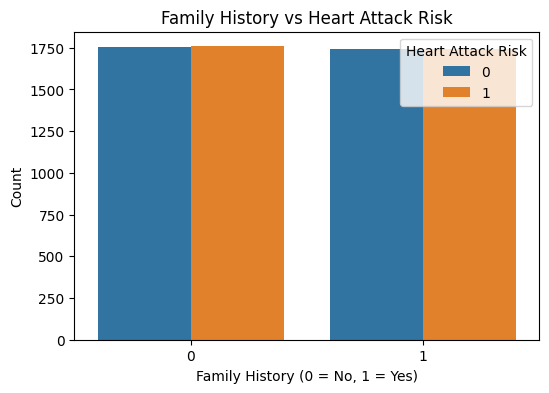

In [24]:
# if any of family member had heart attack ever, can it effect other member
plt.figure(figsize=(6,4))
sns.countplot(x='Family History of Heart Disease',hue='Heart Attack Risk',data=data)
plt.title("Family History vs Heart Attack Risk")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

we can se that if a family member had heart attack ever, it does not mean it can cause to other also

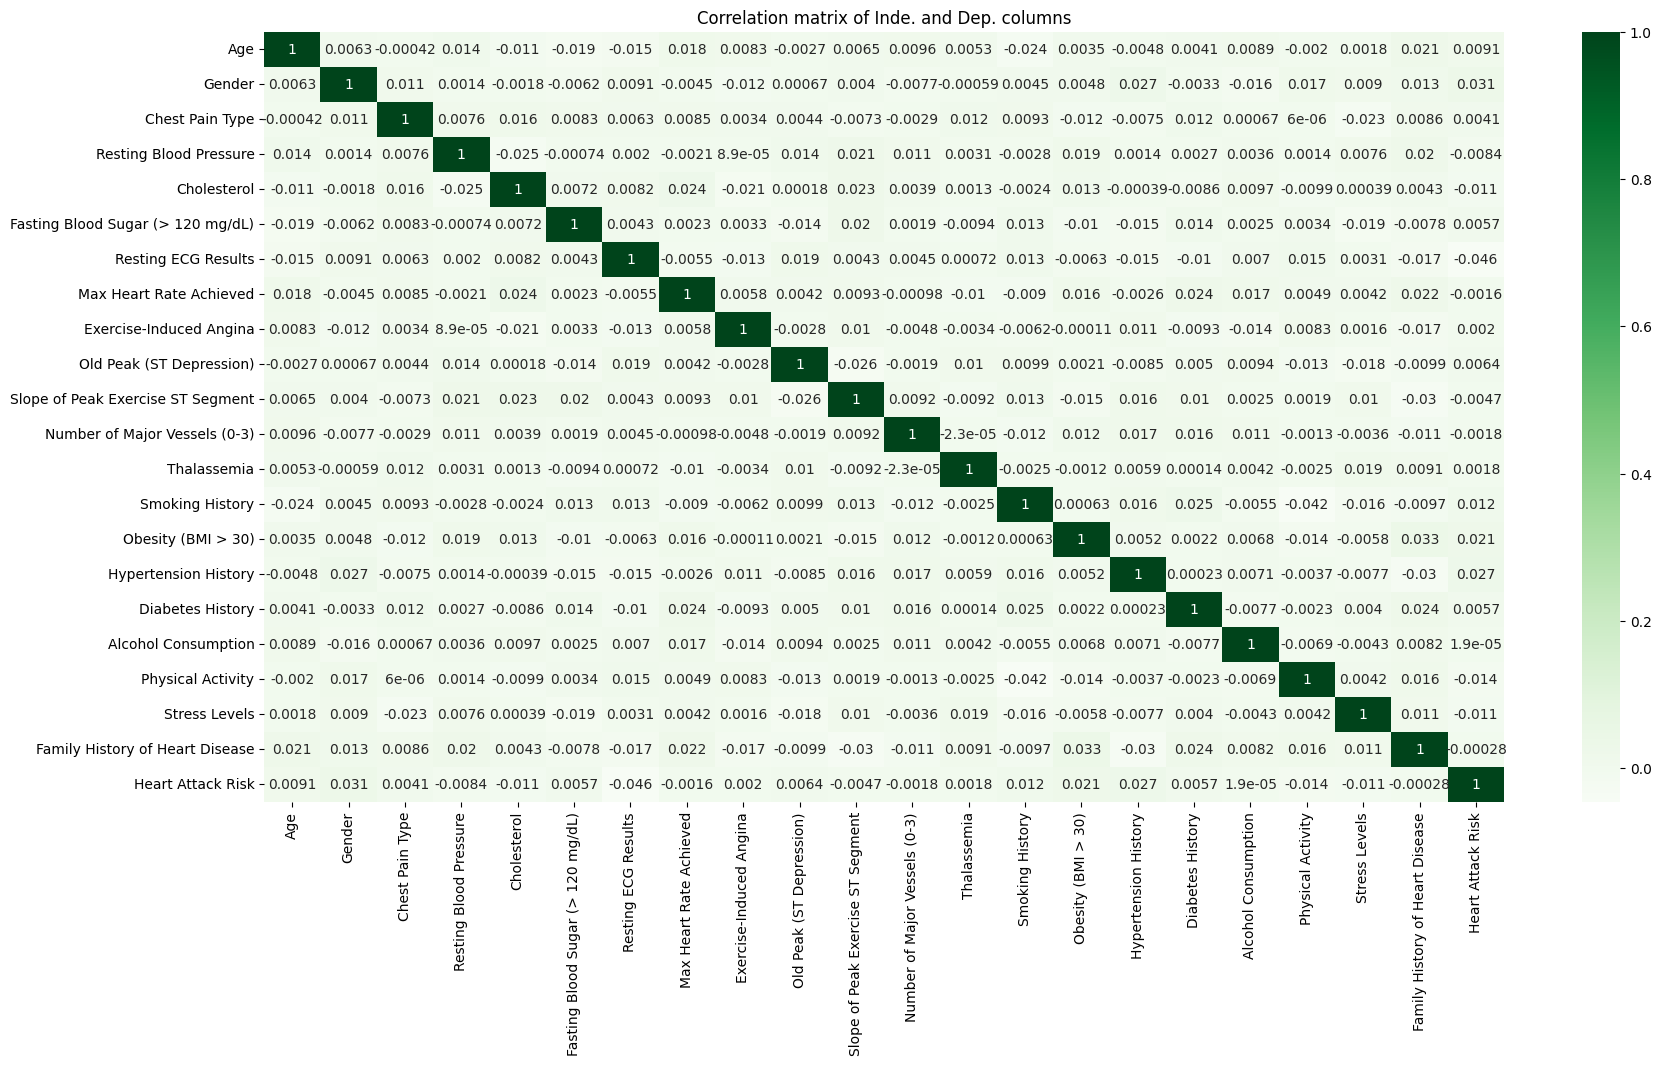

In [25]:
# Now, we analysed the chart and saw many of the independednt features are affecting target variable
# but many of them are not more affecting and some of them were affecting but very less
# So, lets create a heatmap to see the correlation b/w our target varaible and independent features
#i.e; which feature affecting how much

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='Greens', annot=True)
plt.title("Correlation matrix of Inde. and Dep. columns")
plt.show()

we can see that there is not any string relation b/w any of the independent feature with dep. feature(Heart Attack Risk)
So, only one inde. feature can not predict heart attack risk. Therefore, we need to create a model which predict the chances of heart attack more accurately based on all the independednt features together so that our model become more accurate

# Model Creation

In [32]:
data.head(50)

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease,Heart Attack Risk
0,69,0,4,109,487,1,1,122,1,3.51,...,2,1,1,0,0,0,0,1,1,0
1,32,0,2,125,170,0,1,113,1,4.74,...,1,0,1,1,0,0,0,2,0,1
2,89,0,2,186,543,1,0,165,1,2.70,...,1,0,0,1,0,1,1,3,0,0
3,78,0,2,104,367,0,0,117,1,0.62,...,1,1,0,1,0,1,0,1,0,1
4,38,1,1,151,158,1,0,123,1,2.00,...,2,0,1,1,0,1,0,2,0,1
5,92,1,4,199,560,0,0,213,1,0.97,...,3,0,1,0,0,0,1,1,0,1
6,92,1,2,92,537,0,0,161,1,4.69,...,3,1,0,1,0,0,1,1,0,1
7,41,1,2,182,143,1,0,213,1,4.20,...,2,0,0,1,0,0,0,2,1,1
8,20,0,3,180,371,1,1,120,0,0.53,...,2,1,1,1,1,0,0,1,1,0
9,39,0,2,94,489,0,0,87,0,3.73,...,1,1,1,0,1,1,1,2,1,0


In [30]:
# distributing data into independent features and target feature
x = data.drop('Heart Attack Risk',axis=1)
y = data['Heart Attack Risk']

In [31]:
x

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Number of Major Vessels (0-3),Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease
0,69,0,4,109,487,1,1,122,1,3.51,...,2,2,1,1,0,0,0,0,1,1
1,32,0,2,125,170,0,1,113,1,4.74,...,1,1,0,1,1,0,0,0,2,0
2,89,0,2,186,543,1,0,165,1,2.70,...,2,1,0,0,1,0,1,1,3,0
3,78,0,2,104,367,0,0,117,1,0.62,...,0,1,1,0,1,0,1,0,1,0
4,38,1,1,151,158,1,0,123,1,2.00,...,1,2,0,1,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,69,1,4,144,110,0,0,105,1,2.08,...,0,3,0,0,1,0,1,0,1,0
6996,23,0,1,177,481,0,0,135,1,0.17,...,1,3,0,0,1,1,1,0,1,0
6997,86,1,2,174,315,1,0,203,0,2.77,...,0,3,0,0,0,1,0,0,3,0
6998,91,0,4,198,129,1,1,194,0,3.42,...,1,3,1,0,1,0,1,0,2,1


In [ ]:
# we can see that in our indep. features, some columns has binary values, some of them have 1 
# digit values but some of them have values in 3 digits so we need to make our x var at same 
# scale so that our model learn in similar from all the comlumns

col = ['Age','Resting Blood Pressure','Cholesterol','Max Heart Rate Achieved','Old Peak (ST Depression)']
scaler = StandardScaler()
x[col] = scaler.fit_transform(x[col])


In [35]:
x

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar (> 120 mg/dL),Resting ECG Results,Max Heart Rate Achieved,Exercise-Induced Angina,Old Peak (ST Depression),...,Number of Major Vessels (0-3),Thalassemia,Smoking History,Obesity (BMI > 30),Hypertension History,Diabetes History,Alcohol Consumption,Physical Activity,Stress Levels,Family History of Heart Disease
0,0.458199,0,4,-1.111365,0.927244,1,1,-0.519004,1,0.294311,...,2,2,1,1,0,0,0,0,1,1
1,-1.115617,0,2,-0.606312,-1.239645,0,1,-0.727237,1,1.001150,...,1,1,0,1,1,0,0,0,2,0
2,1.308911,0,2,1.319203,1.310038,1,0,0.475884,1,-0.171169,...,2,1,0,0,1,0,1,1,3,0
3,0.841020,0,2,-1.269194,0.106970,0,0,-0.634689,1,-1.366476,...,0,1,1,0,1,0,1,0,1,0
4,-0.860404,1,1,0.214400,-1.321672,1,0,-0.495867,1,-0.573436,...,1,2,0,1,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.458199,1,4,-0.006561,-1.649782,0,0,-0.912332,1,-0.527463,...,0,3,0,0,1,0,1,0,1,0
6996,-1.498438,0,1,1.035111,0.886230,0,0,-0.218224,1,-1.625076,...,1,3,0,0,1,1,1,0,1,0
6997,1.181305,1,2,0.940413,-0.248481,1,0,1.355087,0,-0.130943,...,0,3,0,0,0,1,0,0,3,0
6998,1.393983,0,4,1.697993,-1.519905,1,1,1.146855,0,0.242591,...,1,3,1,0,1,0,1,0,2,1


In [37]:
# splitting data into training and testing data
# 20% data for testing and 80% data for training (test_size=0.2)
# random state = 42 (ensures same splitting of trainng and testing data for each execution)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((5600, 21), (5600,), (1400, 21), (1400,))

# Logistic Regression model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logisticModel = LogisticRegression()
logisticModel.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
logi_pred = logisticModel.predict(xtest)

In [43]:
# Evaluation of Logistic Regression model
print("Accuracy of logistic model:",accuracy_score(ytest, logi_pred))

Accuracy of logistic model: 0.5221428571428571


In [44]:
print("confusion_matrix for Logistic model\n",confusion_matrix(ytest, logi_pred))

confusion_matrix for Logistic model
 [[348 369]
 [300 383]]


In [45]:
print("Classification Report for Logistic Regression model\n",classification_report(ytest, logi_pred))

Classification Report for Logistic Regression model
               precision    recall  f1-score   support

           0       0.54      0.49      0.51       717
           1       0.51      0.56      0.53       683

    accuracy                           0.52      1400
   macro avg       0.52      0.52      0.52      1400
weighted avg       0.52      0.52      0.52      1400



In [ ]:
'''
>) This logostic regn model achieves a accuracy of 52% which is slightly better
    than random guessing but it is not good accuracy. This model not clearly distinguishes
    b/w risk or no-risk

>) in confusio mtx we can see that model confuses because there are 369 FP and 300 FN pedictions
>) FP = 300 are dangerous -> risky predicted as safe
>) precision for class 1 is 51% -> only half of the patients predicted as high risk who are actually at risk
    This indicates a high FP rate
>) recall value for class 1 is only 56% -> indicates that model only identifies slightly more than half of actual risk cases
>) F1-Score = 0.52 indicates weak balance b/w precision and recall
>) This indicates that overall performance of logistic model in insufficient heart attack risk decision.
>) we need other strong predictor
'''